In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#to remove unwanted columns
df.drop('Unnamed: 0', axis=1, inplace=True)

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 4)

In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

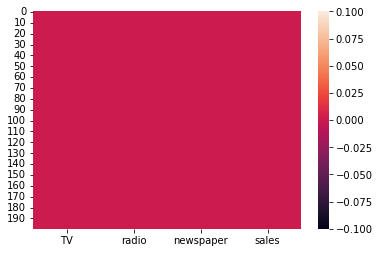

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

<Figure size 3600x3600 with 0 Axes>

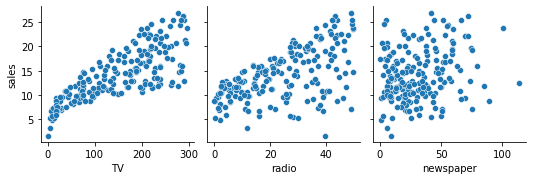

In [8]:
#check relation between input and output  using scatterplot
#input variables: TV, radio and newspaper
#output variable: sales
plt.figure(figsize=(50,50))

sns.pairplot(data=df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', kind='scatter')
plt.show()

In [9]:
#Nice upword growth that means as we investment more on TV the sales is also
#increasing that means +ve correlation means good +ve correlation between
#TV(input) with sales(output)
#see the scatter plot radio with sales : - looks better but lot of data is 
#scattered but scatter data overhere +ve correlation, But correlation is less
#as compared to TV
#It is very bed correlation means no +ve corr and no -ve corr means no
#correlation newspaper with sales because data point are scattered

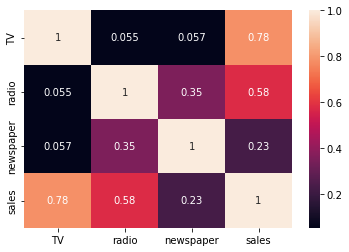

In [10]:
#second method: check relation between input and output
sns.heatmap(df.corr(),annot=True )
plt.show()

In [11]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df['TV'].skew()

-0.06985336213274573

In [13]:
df['radio'].skew()

0.09417463149664404

In [14]:
df['newspaper'].skew()

0.8947204074986175

In [60]:
#Multiple linear regression
#take inputs TV, radio and newspaper and output as sales
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [61]:
#first method: select input
X=df.drop('sales', axis=1)
#or X=[['TV', 'radio', 'newspaper']]

Y=df['sales']   #selecting output


In [62]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [63]:
Y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [64]:
#train test split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [65]:
X_train.head()

,TV,radio,newspaper
116,139.2,14.3,25.6
67,139.3,14.5,10.2
78,5.4,29.9,9.4
42,293.6,27.7,1.8
17,281.4,39.6,55.8


In [66]:
lr = LinearRegression()

In [67]:
lr.fit(X_train,Y_train)

LinearRegression()

In [68]:
#check slope and intercept
lr.coef_

array([0.04695205, 0.17658644, 0.00185115])

In [69]:
lr.intercept_

2.937215734690609

In [70]:
#find the predicted output
#test the model with test data
Y_pred=lr.predict(X_test)

In [71]:
print('mean squared error:', mean_squared_error(Y_test,Y_pred))

mean squared error: 1.9289249074665713


In [72]:
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print(rmse)

1.3888574107756964


In [73]:
print('R2-score:', r2_score(Y_test,Y_pred))

R2-score: 0.9224605706201435


In [74]:
#R2 score is close to 1 which means it is a good score and MSE is also very low

# Assumptions of Linear Regression

There are 4 assumptions of Linear Regression:

1. There should not be multicolinearity in linear regression.
2. There should be a linear relation between input and output.
3. The linear relation should be homoskedastic and not hetroskedastic.
4. Residual should be normally distributed curve. (means skewness should be low)

In [75]:
#First solve multicolinearity condition:
#Multicolinearity means if an input is correlated with another input.

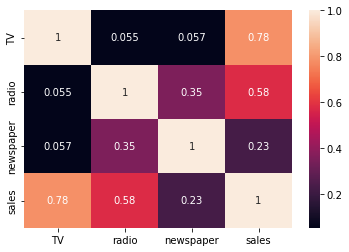

In [76]:
sns.heatmap(df.corr(), annot=True)
plt.show()

As newspaper and radio have a correlation of 0.35, we have to eliminate one of them.

Radio(0.58) has a better correlation with sales(output) than newspaper(0.23), so we drop newspaper as we cannot have multicolinearity 

In [77]:
#Now we take only TV and radio as inputs
X=df[['TV', 'radio']]
Y=df['sales']

In [78]:
#train test split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.3, random_state=1)

In [79]:
lr=LinearRegression()

In [80]:
lr.fit(X_train, Y_train)

LinearRegression()

In [81]:
m=lr.coef_
m

array([0.04697554, 0.17765046])

In [82]:
c=lr.intercept_
c

2.9647671191401574

In [83]:
#Test the model
Y_pred=lr.predict(X_test)
Y_pred

array([21.6786746 , 16.43892004,  7.70903733, 17.92158421, 18.67111499,
       23.74835071, 16.24962798, 13.37657045,  9.12364788, 17.27585015,
       14.40513872,  9.85730919, 17.31402746, 16.61437382, 15.02857874,
       15.42489496, 12.42021473, 17.34892466, 11.09570896, 18.10320281,
        9.38655615, 12.65171582,  8.70947008, 10.49704698, 11.35942404,
       15.03043294,  9.73268033, 19.46660993, 18.26160716, 17.21035792,
       21.60669421, 14.58454377, 16.32136242, 12.3456783 , 19.99853614,
       15.38120487, 14.01613968, 10.05601014, 20.94792024,  7.45626202,
        3.65120693,  7.26465144,  5.99278035, 18.39717578,  8.2996665 ,
       14.13011074, 14.95229617, 20.37261349, 20.60678937, 19.48376432,
       24.08819667, 14.89416249,  6.71850002, 19.74995269, 18.99448081,
       12.52042181, 14.18823598,  6.09331077, 15.39558485,  9.58586241])

In [84]:
print('mean squared error:', mean_squared_error(Y_test,Y_pred))

mean squared error: 1.9147050289721796


In [85]:
mse = mean_squared_error(Y_test,Y_pred)
rmse = np.sqrt(mse)
print('Root mean squared error: ',rmse)

Root mean squared error:  1.3837286688408894


In [86]:
print('R2-score:', r2_score(Y_test,Y_pred))

R2-score: 0.9230321850256801


2nd Assumption: Linear relation

 when does linear regression  do best work ? 
 where got better relationship 
 
 we cannot see 3D graph on system so we have some hack(trick) , how to 
 check input and output both are related or not
 we calculate the residual (this is error means 
 Residual =(actual output-predicted output)

In [87]:
#check linear relationship between inputs and output

#find residual
residual= Y_test-Y_pred
print(residual.head())

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
Name: sales, dtype: float64


In [88]:
dict={'Y_pred': Y_pred, 'Residual': residual}
df1=pd.DataFrame(dict)
df1.head()

,Y_pred,Residual
58,21.678675,2.121325
40,16.438920,0.161080
34,7.709037,1.790963
102,17.921584,-3.121584
184,18.671115,-1.071115


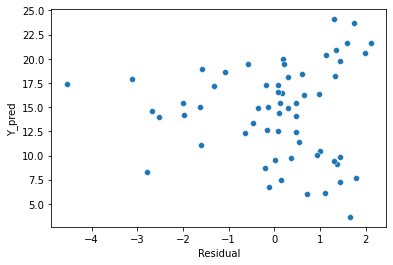

In [89]:
#Visaulize scatterplot between Y_pred and residual
sns.scatterplot(data=df1, x='Residual', y='Y_pred' )
plt.show()

2nd assumption is not fulfilled as there is no linear relationship between input and output according to the above scatterplot.


The third assumption is based on the 2nd assumption so the 3rd assumption also fails.

In [90]:
#3rd Assumption : -  if occur linear relation then next check relation is 
#homoskedatik, not a heteroskedastik 
#but no found any linear relation means
#not satify 3rd assumption
#means 3rd Assumption totally depend on Second Assumption
#Homoskedatik means datapoints close each others
#Heteroskedastik means datapoints not close each others

In [91]:
#4. Assumption of linear regression : - Residual should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
#use distplot()

-1.093518163944734


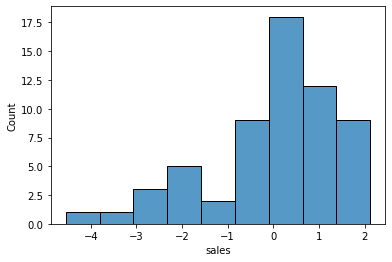

In [92]:
sns.histplot(residual)
print(residual.skew())
plt.show()

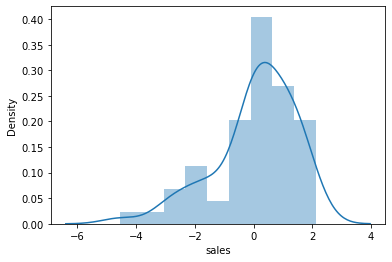

In [93]:
#distplot
sns.distplot(residual)
plt.show()

In [94]:
#Polynomial Linear Regression
#when 2 or more assumptions fail then we use polynomial linear regression
#We will increase the degree of input
#here inputs are TV and Radio and output is sales


In [95]:
#Increase degree of input of our dataset 
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#Y=m1*(X1*2)+m2(X1*1)+m3(X2*2)+m4(X2**1)+c
#equation Y=m1*TV*2+m2*TV+m3*radio*2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1*2+bx1+cx2*2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b

In [96]:
X=df[['TV', 'radio']]
Y=df['sales']


In [97]:
#increase the degree of input variable
#take degree of input=2
#call PolynomialFeatures inbuilt class
from sklearn.preprocessing import PolynomialFeatures

In [98]:
#create object of Polynomialfeatures class and give degree of input
#pf=PolynomialFeatures(2)
#as degree 2 failed we will increase it to 3
pf=PolynomialFeatures(3)

In [99]:
X_poly=pf.fit_transform(X)      #m1*TV^2+m2*TV+m3*radio^2+m4*radio+c
#fit_transform() inbuilt method converts into numpy 2d array

In [100]:
X_poly

array([[1.00000000e+00, 2.30100000e+02, 3.78000000e+01, ...,
        2.00135918e+06, 3.28776084e+05, 5.40101520e+04],
       [1.00000000e+00, 4.45000000e+01, 3.93000000e+01, ...,
        7.78238250e+04, 6.87298050e+04, 6.06984570e+04],
       [1.00000000e+00, 1.72000000e+01, 4.59000000e+01, ...,
        1.35790560e+04, 3.62371320e+04, 9.67025790e+04],
       ...,
       [1.00000000e+00, 1.77000000e+02, 9.30000000e+00, ...,
        2.91359700e+05, 1.53087300e+04, 8.04357000e+02],
       [1.00000000e+00, 2.83600000e+02, 4.20000000e+01, ...,
        3.37801632e+06, 5.00270400e+05, 7.40880000e+04],
       [1.00000000e+00, 2.32100000e+02, 8.60000000e+00, ...,
        4.63285526e+05, 1.71661160e+04, 6.36056000e+02]])

In [101]:
#train test split
X_train, X_test, Y_train, Y_test=train_test_split(X_poly,Y,test_size=0.2, random_state=1)

In [102]:
#train the model
lr=LinearRegression()

In [103]:
lr.fit(X_train,Y_train)

LinearRegression()

In [104]:
#test the model
Y_pred=lr.predict(X_test)

In [105]:
lr.coef_

array([ 0.00000000e+00,  8.82441986e-02,  3.49860246e-02, -4.42813296e-04,
        1.33023344e-03, -8.30299505e-04,  7.88824020e-07, -8.50924178e-07,
       -9.90404914e-07,  1.74195188e-05])

In [106]:
lr.intercept_

4.2291072755109145

In [107]:
mse=mean_squared_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print('mean squared error:', mse)
print('Root mean squared error:', rmse)

mean squared error: 0.15324842568855504
Root mean squared error: 0.3914695718552785


In [108]:
#we can see that the error has reduced as compared to the previous model

In [109]:
print('R2-score:', r2_score(Y_test,Y_pred))

R2-score: 0.9917493901618984


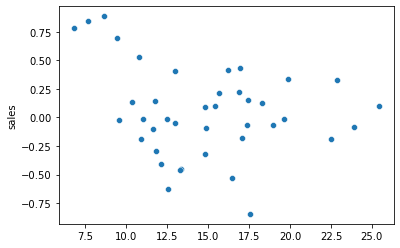

In [110]:
#Work on remaining 3 assumptions
#1. check linear relation between input and output: use trick
residual=Y_test-Y_pred
#create scatter plot between Y_pred and rresidual
sns.scatterplot(Y_pred,residual)
plt.show()

In [111]:
dic={'Y_pred': Y_pred, 'residual': residual}
df_new=pd.DataFrame(dict)
df_new.head()

,Y_pred,Residual
58,21.678675,2.121325
40,16.438920,0.161080
34,7.709037,1.790963
102,17.921584,-3.121584
184,18.671115,-1.071115


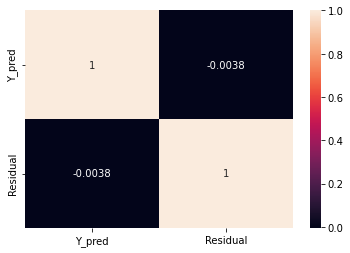

In [112]:
sns.heatmap(df_new.corr(), annot=True)
plt.show()

0.1722064465263987


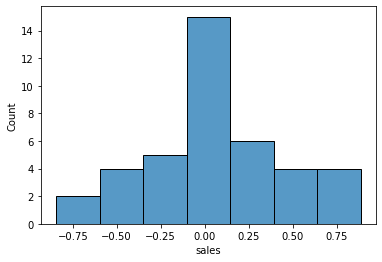

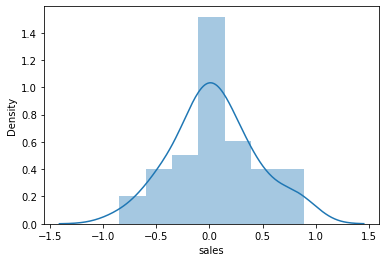

In [113]:
#3rd assumption: failed 
#4th assumption: Normal distribution curve
sns.histplot(residual)
print(residual.skew())
plt.show()

#distplot
sns.distplot(residual)
plt.show()

In [114]:
#4th assumption also failed as positive skewness present
#we start again with degree as 3 and restart and run all

In [115]:
residual.mean()

0.04919605325436231

In [116]:
residual.median()

-0.013193667903631301

In [118]:
#Now we check with degree 4 just to be sure and try to reduce the skewness even more
#Degree 4 made no difference so we stick with degree 3